In [89]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main
import pysindy as psd
from SINDy import SINDy_Train

In [90]:
flow_all, _, occupancy_all, flow_dt, _, occupancy_dt = data_loader_main(csv_dict='Sim_Results/Ramp_ALIANA')
control_input = pd.read_csv('Results/Meter_Rate_ALIANA.csv')

In [91]:
control_input = control_input/10
control_input = control_input.iloc[1:,:]

In [92]:
# #remove initial 5 seconds
flow_all = flow_all.iloc[2:,:]
flow_dt = flow_dt.iloc[2:,:]
occupancy_all = occupancy_all.iloc[2:,:]
occupancy_dt = occupancy_dt.iloc[2:,:]
control_input = control_input.iloc[2:,:]

IndexError: single positional indexer is out-of-bounds

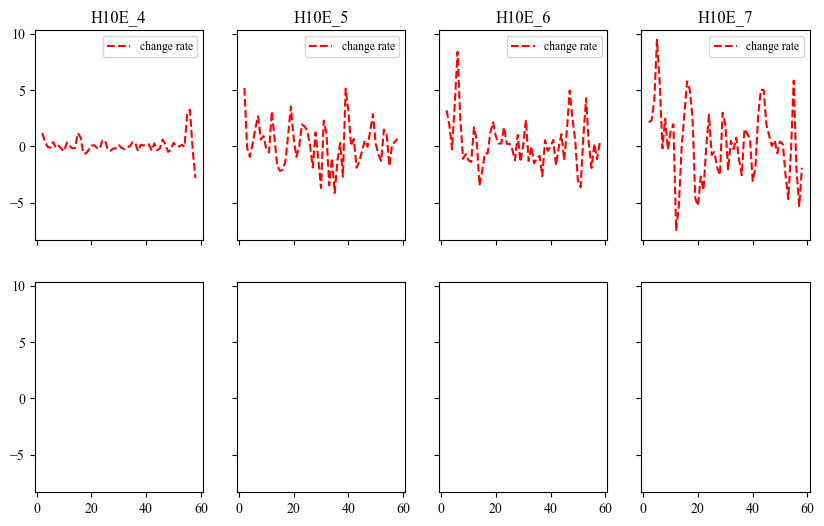

In [93]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(4):
        index = row*4 + col
        axs[row, col].plot(occupancy_dt.iloc[:, index], "--", label = 'change rate', color = "red")
        axs[row, col].legend(loc='upper right', fontsize='small')
        axs[row, col].set_title(occupancy_all.columns[index], fontsize=12)

for col in range(4):
    axs[1,col].set_xlabel('Time Step\n(3mins)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('dq/dt\n(Veh/3mins)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.show()
#fig.savefig('Figures/Flow_val.png', dpi=300)

In [ ]:
plt.rcParams['font.family'] = 'Times New Roman'
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(4):
        index = row*4 + col
        axs[row, col].plot(occupancy_all.iloc[:, index], "--", label = 'change rate', color = "red")
        axs[row, col].legend(loc='upper right', fontsize='small')
        axs[row, col].set_title(flow_all.columns[index], fontsize=12)

for col in range(4):
    axs[1,col].set_xlabel('Time Step\n(3mins)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('dq/dt\n(Veh/3mins)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.show()

In [ ]:
train_obs = round(flow_all.shape[0]*0.6)

In [94]:
flow_train = flow_all.iloc[:train_obs,:]
flow_dt_train = flow_dt.iloc[:train_obs,:]
flow_val = flow_all.iloc[train_obs:, :]
flow_dt_val = flow_dt.iloc[train_obs:, :]
control_train = control_input.iloc[:train_obs,:]
control_val = control_input.iloc[train_obs:, :]

In [95]:
occupancy_train = occupancy_all.iloc[:train_obs,:]
occupancy_dt_train = occupancy_dt.iloc[:train_obs,:]
occupancy_val = occupancy_all.iloc[train_obs:, :]
occupancy_dt_val = occupancy_dt.iloc[train_obs:, :]

## SINDY

In [96]:
model = SINDy_Train(x = occupancy_all, dx = occupancy_dt, u = control_input, threshold= 0.0001)

In [97]:
model.print()

(x0)' = 0.007 x0^3 + -0.002 x0^2 x1 + 0.005 x0^2 x2 + 0.009 x0^2 x3 + -0.005 x0^2 u0 + 0.004 x0^2 u1 + -0.001 x0^2 u2 + -0.001 x0^2 u3 + -0.018 x0 x1^2 + -0.011 x0 x1 x2 + -0.009 x0 x1 x3 + 0.017 x0 x1 u0 + -0.029 x0 x1 u1 + 0.002 x0 x1 u2 + 0.002 x0 x1 u3 + -0.026 x0 x2^2 + 0.010 x0 x2 x3 + -0.003 x0 x2 u0 + 0.019 x0 x2 u1 + 0.019 x0 x3^2 + -0.003 x0 x3 u0 + -0.013 x0 x3 u1 + -0.001 x0 u0^2 + 0.002 x0 u0 u1 + 0.001 x0 u1 u2 + -0.010 x1^3 + -0.001 x1^2 x2 + 0.036 x1^2 x3 + -0.001 x1^2 u0 + -0.001 x1^2 u2 + -0.016 x1 x2^2 + 0.036 x1 x2 x3 + 0.001 x1 x2 u0 + -0.009 x1 x2 u1 + 0.001 x1 x2 u2 + 0.021 x1 x3^2 + -0.020 x1 x3 u0 + 0.003 x1 x3 u1 + -0.003 x1 x3 u2 + -0.002 x1 x3 u3 + 0.002 x1 u0^2 + 0.002 x1 u0 u1 + -0.009 x1 u0 u2 + 0.002 x1 u0 u3 + -0.004 x1 u1 u2 + 0.003 x1 u1 u3 + -0.001 x1 u2^2 + 0.002 x1 u2 u3 + 0.004 x1 u3^2 + 0.052 x2^3 + -0.022 x2^2 x3 + -0.013 x2^2 u0 + -0.001 x2^2 u1 + 0.001 x2^2 u2 + -0.001 x2^2 u3 + 0.021 x2 x3^2 + -0.004 x2 x3 u0 + -0.001 x2 x3 u1 + -0.001 x2 x3 

In [98]:
# Predict derivatives using the learned model
occupancy_dt_pred = model.predict(occupancy_all, u=control_input)

In [99]:
# theta = np.array(library.transform(pd.concat([flow_val, control_val], axis=1)))
# sindy_coeff = np.transpose(model.coefficients())
# flow_dt_pred_2 = np.matmul(theta, sindy_coeff)

In [100]:
flow_dt_val = flow_dt_val.reset_index(drop=True)
occupancy_dt_val = occupancy_dt_val.reset_index(drop=True)
occupancy_dt = occupancy_dt.reset_index(drop=True)

IndexError: single positional indexer is out-of-bounds

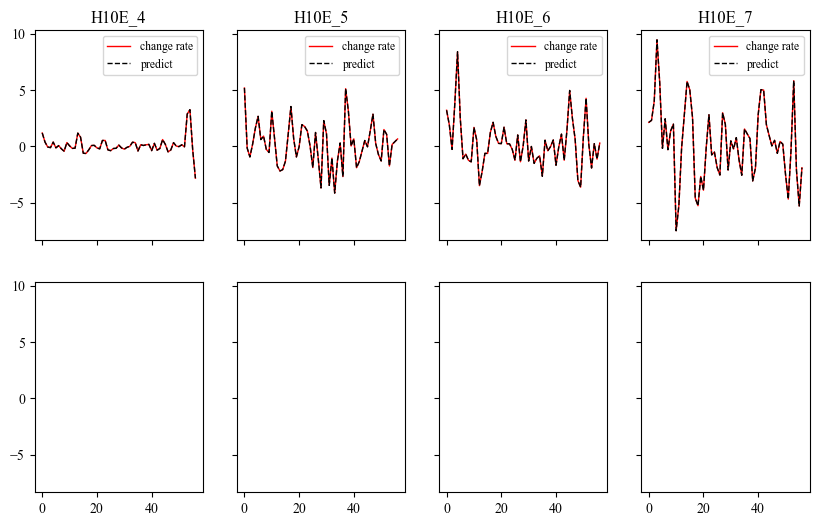

In [101]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(4):
        index = row*4 + col
        axs[row, col].plot(occupancy_dt.iloc[:, index], "-", label = 'change rate', color = "red",linewidth=1)
        axs[row, col].plot(occupancy_dt_pred[:, index], "--", label = 'predict', color = "black", linewidth=1)
        axs[row, col].legend(loc='upper right', fontsize='small')
        axs[row, col].set_title(flow_all.columns[index], fontsize=12)
        # axs[row, col].set_ylim([-50, 50])

for col in range(4):
    axs[1,col].set_xlabel('Time Step (2mins)', fontsize = 12)

for row in range(2):
    axs[row,0].set_ylabel('dk/dt (%)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/SINDy_Predict.png', dpi=300)